**David Veitch** - 1004657017

**Proposal Date** - 10/9/2018

**Project Title** - What Drives the Bottom Line at the Box Office

**Primary Questions** 

1) Are NYT Critics picks good predictors of whether a film will be successful at the box office?

2) What are the characteristics of movies that do well at the box office?

3) How have the plots of the highest grossing movies changed over time?

In [8]:
import matplotlib as plt
import numpy as np
import json
import requests
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib inline

**Data Collection**

**Question 1** I will use the NYT Movie Reviews API to collect data on what films have been labelled as critics picks. For example, the following query finds  all movie reviews by the NYT for the time period of Jan-1-2018 - Jan-14-2018 (note that of the 18 films reviewed, 3 are critics picks).

In [9]:
url = "https://api.nytimes.com/svc/movies/v2/reviews/search.json";
url += '?'
url += '&' + 'api-key' + '=' + "f192c8e016da48359ddd9772434ad63a"
url += '&' + 'opening-date' + '=' + "2018-01-01;2018-01-14"

df = pd.read_json(url, orient = 'records')
nytdata = json_normalize(df['results'])

nytdata

,byline,critics_pick,date_updated,display_title,headline,link.suggested_link_text,link.type,link.url,mpaa_rating,multimedia.height,multimedia.src,multimedia.type,multimedia.width,opening_date,publication_date,summary_short
0,BEN KENIGSBERG,0,2018-08-24 16:44:01,93Queen,Review: ‘93Queen’ Follows Female Jewish EMS Wo...,Read the New York Times Review of 93Queen,article,http://www.nytimes.com/2018/07/24/movies/93que...,,140,https://static01.nyt.com/images/2018/07/25/art...,mediumThreeByTwo210,210,2018-01-01,2018-07-24,The feature debut of Paula Eiselt tells of the...
1,GLENN KENNY,0,2018-02-12 17:44:02,Proud Mary,"Review: In ‘Proud Mary,’ Taraji P. Henson Is a...",Read the New York Times Review of Proud Mary,article,http://www.nytimes.com/2018/01/12/movies/proud...,R,140,https://static01.nyt.com/images/2018/01/15/art...,mediumThreeByTwo210,210,2018-01-12,2018-01-12,Babak Najafi directed this action thriller tha...
2,GLENN KENNY,1,2018-01-19 17:44:01,Saturday Church,"Review: In ‘Saturday Church,’ Coming of Age, a...",Read the New York Times Review of Saturday Church,article,http://www.nytimes.com/2018/01/11/movies/satur...,,140,https://static01.nyt.com/images/2018/01/12/mov...,mediumThreeByTwo210,210,2018-01-12,2018-01-11,"Luka Kain is a find in “Saturday Church,” as a..."
3,JASON ZINOMAN,0,2018-01-19 17:44:01,Humor Me,"Review: In ‘Humor Me,’ a Dose of Borscht Belt ...",Read the New York Times Review of Humor Me,article,http://www.nytimes.com/2018/01/11/movies/humor...,,140,https://static01.nyt.com/images/2018/01/12/art...,mediumThreeByTwo210,210,2018-01-12,2018-01-11,"In Sam Hoffman’s directorial debut, a sad-sack..."
4,MANOHLA DARGIS,0,2018-02-11 17:44:01,Lover for a Day,Review: A Man and a Woman (and Another Woman) ...,Read the New York Times Review of Lover for a Day,article,http://www.nytimes.com/2018/01/11/movies/lover...,,140,https://static01.nyt.com/images/2018/01/12/art...,mediumThreeByTwo210,210,2018-01-12,2018-01-11,"In Philippe Garrel’s drama, a 23-year-old woma..."
5,GLENN KENNY,0,2018-01-19 17:44:01,Acts of Violence,Review: ‘Acts of Violence’ Delivers What Its T...,Read the New York Times Review of Acts of Viol...,article,http://www.nytimes.com/2018/01/11/movies/acts-...,R,140,https://static01.nyt.com/images/2018/01/12/mov...,mediumThreeByTwo210,210,2018-01-12,2018-01-11,"The movie, which stars Bruce Willis and Cole H..."
6,GLENN KENNY,0,2018-01-26 17:44:01,Freak Show,"Review: In ‘Freak Show,’ the Boy Who Would be ...",Read the New York Times Review of Freak Show,article,http://www.nytimes.com/2018/01/11/movies/freak...,,140,https://static01.nyt.com/images/2018/01/12/mov...,mediumThreeByTwo210,210,2018-01-12,2018-01-11,"The film, directed by Trudie Styler, is anothe..."
7,BEN KENIGSBERG,0,2018-01-19 17:44:01,Bitter Money,"Review: In ‘Bitter Money,’ Documenting China’s...",Read the New York Times Review of Bitter Money,article,http://www.nytimes.com/2018/01/11/movies/bitte...,,140,https://static01.nyt.com/images/2018/01/12/mov...,mediumThreeByTwo210,210,2018-01-12,2018-01-11,The latest film from Wang Bing follows the mas...
8,MONICA CASTILLO,0,2018-01-19 17:44:01,Dim the Fluorescents,Review: ‘Dim the Fluorescents’ Unites Two Room...,Read the New York Times Review of Dim the Fluo...,article,http://www.nytimes.com/2018/01/11/movies/dim-t...,,140,https://static01.nyt.com/images/2018/01/10/mov...,mediumThreeByTwo210,210,2018-01-12,2018-01-11,"In this tragicomedy, an actress and a playwrig..."
9,A.O. SCOTT,0,2018-02-11 17:44:01,The Commuter,"Review: ‘The Commuter’ Has Panic, Paranoia and...",Read the New York Times Review of The Commuter,article,http://www.nytimes.com/2018/01/11/movies/the-c...,PG-13,140,https://static01.nyt.com/images/2018/01/12/art...,mediumThreeByTwo210,210,2018-01-12,2018-01-11,Our favorite angry-dad action hero gets back t...


**Question 2** Characteristics of movies, and box office performance, can be found using THE NUMBERS. For example below is various characteristics, as well as box office performance, for the movie **The Shape of Water**.

In [10]:
url = 'https://www.the-numbers.com/movie/Shape-of-Water-The#tab=box-office'
r = requests.get(url)
html = r.text
tables = pd.read_html(html,header = 0)
tables[0]

,Theatrical Performance,Unnamed: 1,Unnamed: 2
0,Domestic Box Office,"$63,859,435",Details
1,International Box Office,"$125,401,876",Details
2,Worldwide Box Office,"$189,261,311",NaN
3,Home Market Performance,NaN,NaN
4,Est. Domestic DVD Sales,"$2,874,750",Details
5,Est. Domestic Blu-ray Sales,"$6,153,784",Details
6,Total Est. Domestic Video Sales,"$9,028,534",NaN
7,Further financial details...,NaN,NaN


In [11]:
url = 'https://www.the-numbers.com/movie/Shape-of-Water-The#tab=summary'
r = requests.get(url)
html = r.text
tables = pd.read_html(html)
tables[2]

,0,1
0,Production Budget:,"$19,500,000"
1,Domestic Releases:,"December 1st, 2017 (Limited) by Fox Searchligh..."
2,International Releases:,"January 12th, 2018 (Wide), released as La Form..."
3,Video Release:,"February 27th, 2018 by Fox Home Entertainment"
4,MPAA Rating:,"R for sexual content, graphic nudity, violence..."
5,Running Time:,123 minutes
6,Comparisons:,"Best Picture Oscar Winnersvs. I, TonyaCreate y..."
7,Keywords:,"Romance, 1960s, Cold War, Space Program, Escap..."
8,Source:,Original Screenplay
9,Genre:,Drama


**Question 3** Data on movie plots can be found from the OMDB database.

In [12]:
apikey_omdb = "ab8ac07e"
movie = ['The Graduate']
title = 't=' + movie[0].replace(' ', '+')
req = ('http://www.omdbapi.com/?apikey='+ apikey_omdb + '&'+ title + '&plot=full')
response = pd.read_json(req)
response['Plot'].iloc[0]

'Ben has recently graduated from college, with his parents now expecting great things from him. At his "Homecoming" party, Mrs. Robinson, the wife of his father\'s business partner, has Ben drive her home, which leads to an affair between the two. The affair eventually ends, but comes back to haunt him when he finds himself falling for Elaine, Mrs. Robinson\'s daughter.'

**Exploratory Data Analysis**

**Question 1** To explore the data I will find all movies reviewed by the NYT for a given year (likely 2017) and from the titles that are critics picks and see what types of movies are returned, and their corresponding box office returns. I expect certain categories of movies to not be critics picks, but to be huge successes at the box office (e.g. Star Wars movies). In this case I will consider potentially narrowing the scope of this particular question to certain classes of movies (e.g. original features with production budgets below a certain threshold).

**Question 2** To explore the characteristics of movies that do well at the box office I intend to use the all-time-inflation-adjusted box office rankings at THE NUMBERS. I anticipate having to create a number of custom features for the data (e.g. a dummy variable where the variable = 1 if the movie is in the Star Wars series and 0 otherwise). From there I can create a number of vizualations, including histograms, and compare these figures against movies that are not in the top all-time movies (for example movies that were below the top 1,000 box-office takes of all time).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000246A98C49B0>]],
      dtype=object)

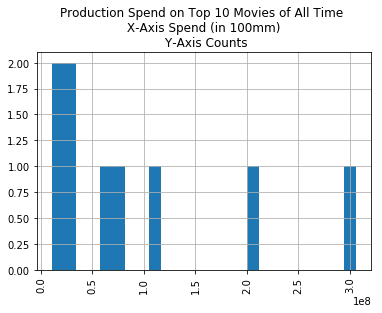

In [15]:
from decimal import Decimal
from re import sub

top_10_movies =['Titanic-(1997)','Star-Wars-Ep-IV-A-New-Hope','ET-The-Extra-Terrestrial',
             'Star-Wars-Ep-VII-The-Force-Awakens','Star-Wars-Ep-V-The-Empire-Strikes-Back',
             'Star-Wars-Ep-VI-Return-of-the-Jedi','Lion-King-The','Star-Wars-Ep-I-The-Phantom-Menace',
             'Jurassic-Park']
production_spend = []


for movie_name in top_10_movies:
    url = 'https://www.the-numbers.com/movie/' + movie_name + '#tab=summary'
    r = requests.get(url)
    html = r.text
    tables = pd.read_html(html,index_col=0)
    money = tables[2].loc['Production\xa0Budget:'].values[0]
    value = Decimal(sub(r'[^\d.]', '', money))
    value = float(value)
    production_spend.append(value)

production_spend = np.asarray(production_spend, dtype=None, order=None)
df=pd.DataFrame({'Production Spend on Top 10 Movies of All Time \n X-Axis Spend (in 100mm) \n Y-Axis Counts':production_spend})
df.hist(bins=25,xrot=90)


**Question 3** To explore how the plots of successful movies have changed over time I intend to vectorize the plots of each movie, and see how prevalent certain themes/genres of successful movies have been over time. I expect to be able to produce graphs such as below:

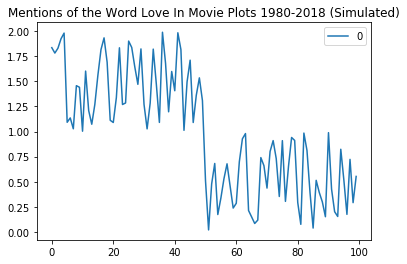

In [16]:
a = np.random.rand(50,1) + 1
b = np.random.rand(50,1)
df1=pd.DataFrame(np.concatenate((a,b)))
df1.plot(title='Mentions of the Word Love In Movie Plots 1980-2018 (Simulated)')

**Modelling**

**Question 1** Multiple linear regression seems like a reasonable choice for assessing the influence of critics picks on movie revenues. Specifically I can test whether the $\beta_{NYTCriticsPick}$ is statistically significant, and whether it is positive or negative. 

**Question 2** Decision Tree Classifiers could be used to assess characteristics of movies that do well at the box office. The advantage is is these are kept somewhat simple they are very interpretable. In order to do this I will have to come up with a metric of what constitutes 'successful at the box office'.

**Question 3** I am least familliar with this angle of data analysis. I anticipate using some sort of unsupervised learning technique, such as text clustering.